In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
import ydata_profiling
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeRegressor

/config/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_929/743203450.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:

df = pd.read_csv("../data/yield_prediction.csv")
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [4]:
df['production']=df['production'].fillna(df['production'].mean())
df['Yield']=df['Yield'].fillna(df['Yield'].mean())

In [5]:
pf=ProfileReport(df)

In [6]:
import scipy.stats as stat

In [7]:
df['area'],parameters=stat.boxcox(df['area']+1)
df['N'],parameters=stat.boxcox(df['N']+1)
df['P'],parameters=stat.boxcox(df['P']+1)
df['K'],parameters=stat.boxcox(df['K']+1)


In [8]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.000000,2.467429,0.000000,1100.0,1.222222


In [9]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

categorical_feature

['state_names', 'district_names', 'season_names', 'crop_names', 'soil_type']

In [10]:
df[categorical_feature].head()

,state_names,district_names,season_names,crop_names,soil_type
0,Maharashtra,AHMEDNAGAR,Autumn,Maize,loamy
1,Maharashtra,AHMEDNAGAR,Kharif,Arhar/Tur,sandy
2,Maharashtra,AHMEDNAGAR,Kharif,Bajra,clay
3,Maharashtra,AHMEDNAGAR,Kharif,Gram,chalky
4,Maharashtra,AHMEDNAGAR,Kharif,Jowar,clay


In [11]:
for feature in categorical_feature:
    temp=df.groupby(feature)['Yield'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [12]:
for feature in categorical_feature:
    labels_ordered=df.groupby([feature])['Yield'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [13]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,0,30,1997,4,22,0.705265,20.770894,2.068260,1014.863796,21.947147,4,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,0,30,1997,2,11,12.597502,20.160426,1.976480,1015.193528,20.643237,0,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,0,30,1997,2,14,17.388040,21.998299,2.000524,1014.184607,21.422312,3,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,0,30,1997,2,12,13.995455,21.776377,2.019750,1015.053118,21.810567,6,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,0,30,1997,2,15,8.099854,20.075734,1.974351,1015.170238,21.930206,3,0.000000,2.467429,0.000000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,0,23,2014,0,15,10.272491,21.635879,2.000060,1014.302213,20.060662,2,1.669585,1.825140,0.000000,3300.0,0.825000
12624,137815,0,23,2014,0,22,8.620367,21.709611,2.053609,1015.803912,21.263478,5,1.647313,2.347047,0.790400,200.0,0.153846
12625,137816,0,23,2014,0,19,13.426504,21.851730,2.027476,1014.031903,20.059945,0,0.000000,0.000000,0.000000,26800.0,0.920962
12626,137817,0,23,2014,1,17,11.592233,21.569380,2.004421,1013.989125,21.835158,6,1.148153,1.349624,0.000000,11500.0,1.223404


In [14]:
feature_scale=[feature for feature in df.columns if feature not in ['Unnamed: 0','Yield']]
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max=min_max.fit_transform(df[feature_scale])
df_minmax=pd.DataFrame(min_max,columns=feature_scale)
df_minmax.head()

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,0.0,0.909091,0.0,1.0,0.916667,0.000000,0.364507,0.701926,0.621244,0.935514,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.0,0.909091,0.0,0.5,0.458333,0.641194,0.068130,0.046239,0.731173,0.302511,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.0,0.909091,0.0,0.5,0.583333,0.899485,0.960403,0.218015,0.394809,0.680725,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.0,0.909091,0.0,0.5,0.500000,0.716567,0.852662,0.355364,0.684362,0.869209,1.000000,0.737640,0.840469,0.995045,0.000928
4,0.0,0.909091,0.0,0.5,0.625000,0.398694,0.027012,0.031028,0.723408,0.927289,0.500000,0.000000,0.756891,0.000000,0.000055


In [15]:
data = pd.concat([df[['Yield']].reset_index(drop=True),pd.DataFrame(df_minmax,columns=feature_scale)],axis=1)

In [16]:
data.head()

,Yield,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,1113.000000,0.0,0.909091,0.0,1.0,0.916667,0.000000,0.364507,0.701926,0.621244,0.935514,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.357955,0.0,0.909091,0.0,0.5,0.458333,0.641194,0.068130,0.046239,0.731173,0.302511,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.557461,0.0,0.909091,0.0,0.5,0.583333,0.899485,0.960403,0.218015,0.394809,0.680725,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.455882,0.0,0.909091,0.0,0.5,0.500000,0.716567,0.852662,0.355364,0.684362,0.869209,1.000000,0.737640,0.840469,0.995045,0.000928
4,1.222222,0.0,0.909091,0.0,0.5,0.625000,0.398694,0.027012,0.031028,0.723408,0.927289,0.500000,0.000000,0.756891,0.000000,0.000055


<AxesSubplot: >

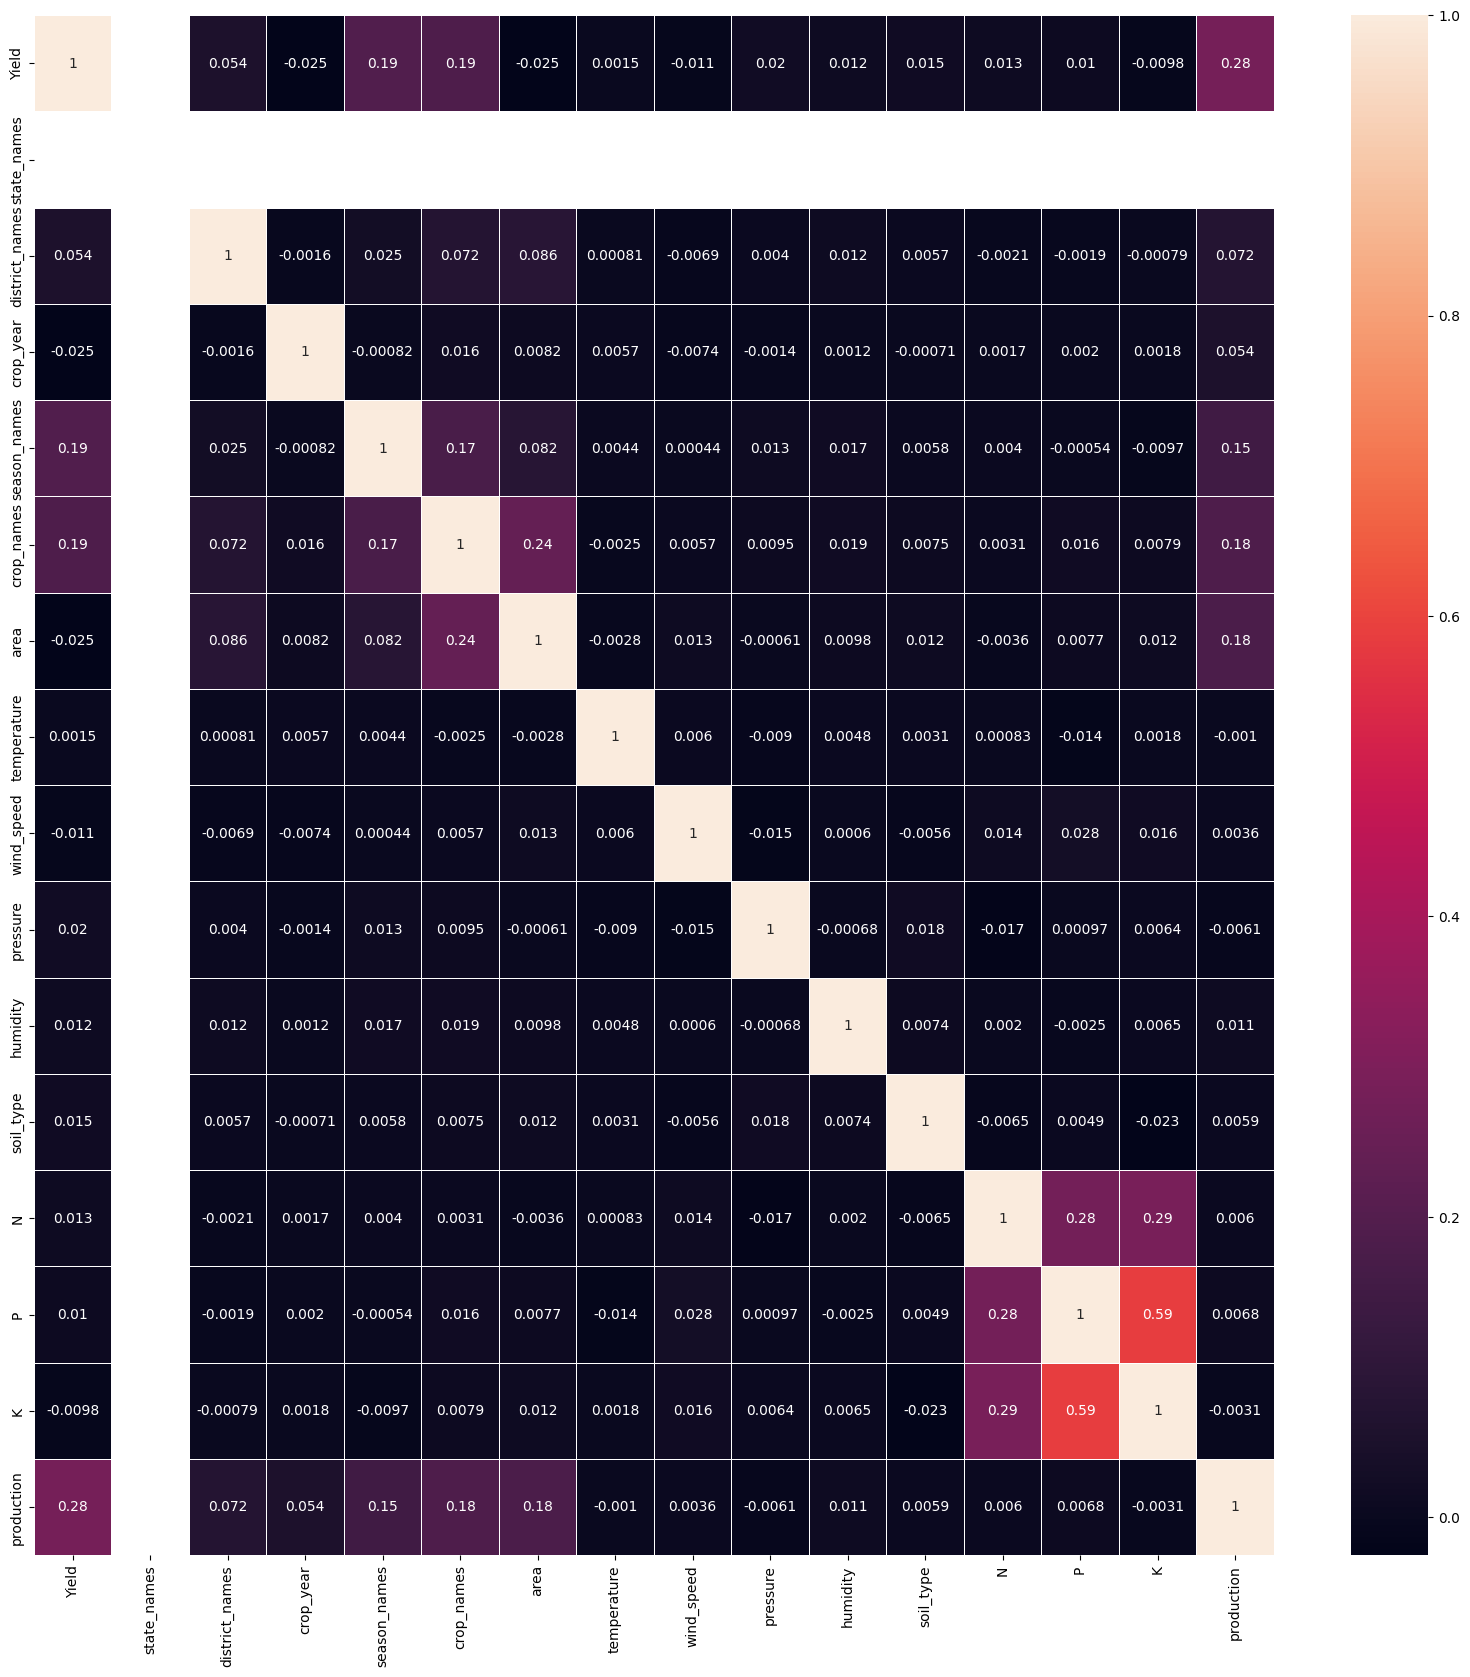

In [17]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [18]:
x1=data.drop(['Yield'],axis=1)
y1=data['Yield']

In [19]:
acc=[]
modelname=[]

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x1,y1,test_size = 0.20,random_state =10)

In [21]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)
predicted_values1=lr.predict(Xtest)




In [22]:
ypred=lr.predict(Xtest)

In [23]:
ypred

array([-0.50733443, -2.66623574,  3.51107702, ..., -3.62460547,
       -1.89912573, -1.77664052])

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

NameError: name 'y_test' is not defined

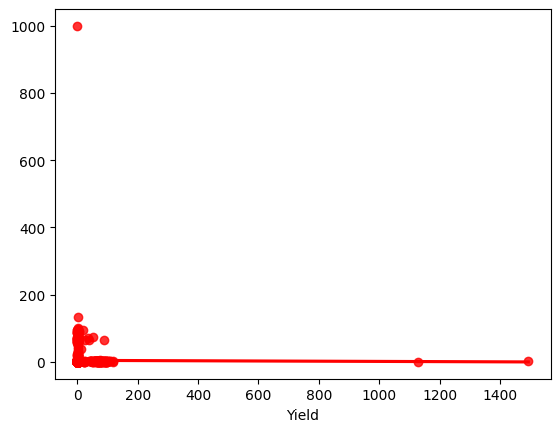

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
5778,0.580180,0.615745,-0.035565
9749,1.000000,0.355966,0.644034
10961,0.373494,0.000000,0.373494
4118,0.000000,0.144426,-0.144426
28,0.585366,1.612923,-1.027557
...,...,...,...
6781,53.295455,0.500000,52.795455
9275,0.835341,0.282644,0.552698
8702,0.577465,0.213228,0.364237
4010,0.166667,0.668759,-0.502093


In [ ]:
r2_score(Ytest,ypred)

0.1415453597798656

DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(Xtrain,Ytrain)
Y_prediction = regressor.predict(Xtest)
r2_score(Ytest,Y_prediction)

0.8975534745408011

In [25]:
from sklearn.tree import DecisionTreeRegressor
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    regressor=DecisionTreeRegressor()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [26]:
np.argmax(scores)

770

In [27]:
scores[np.argmax(scores)]

0.9864627555550077

the best model is found at certain random state 

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=np.argmax(scores))
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
r2_score(y_test,y_pred)

0.8841917540402124

In [29]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CYDecisionTreeRegressor.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

RandomForest

In [30]:
x1=data.drop(['Yield'],axis=1)
y1=data['Yield']

In [237]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x1,y1,test_size = 0.20,random_state =10)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(Xtrain, Ytrain)
y_pred=rf.predict(Xtest)
r2_score(Ytest,y_pred)

0.9171440654926021

In [32]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CYRandomForestRegressor.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(X_test,y_test)